In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import seaborn as sns
import statsmodels.api as sm1
import matplotlib.pylab as plt
%matplotlib inline

from Machine_Learning_for_Asset_Managers.ch4_optimal_clustering import clusterKMeansBase
from Machine_Learning_for_Asset_Managers.ch6_feature_importance_analysis import *

import warnings
# Suppress UserWarning for KMeans when used in Windows environment.
warnings.simplefilter("ignore", UserWarning)
# Suppress FutureWarning for BaggingClassifier.
warnings.simplefilter("ignore", FutureWarning)

Optimization terminated successfully.
         Current function value: 0.380271
         Iterations 7


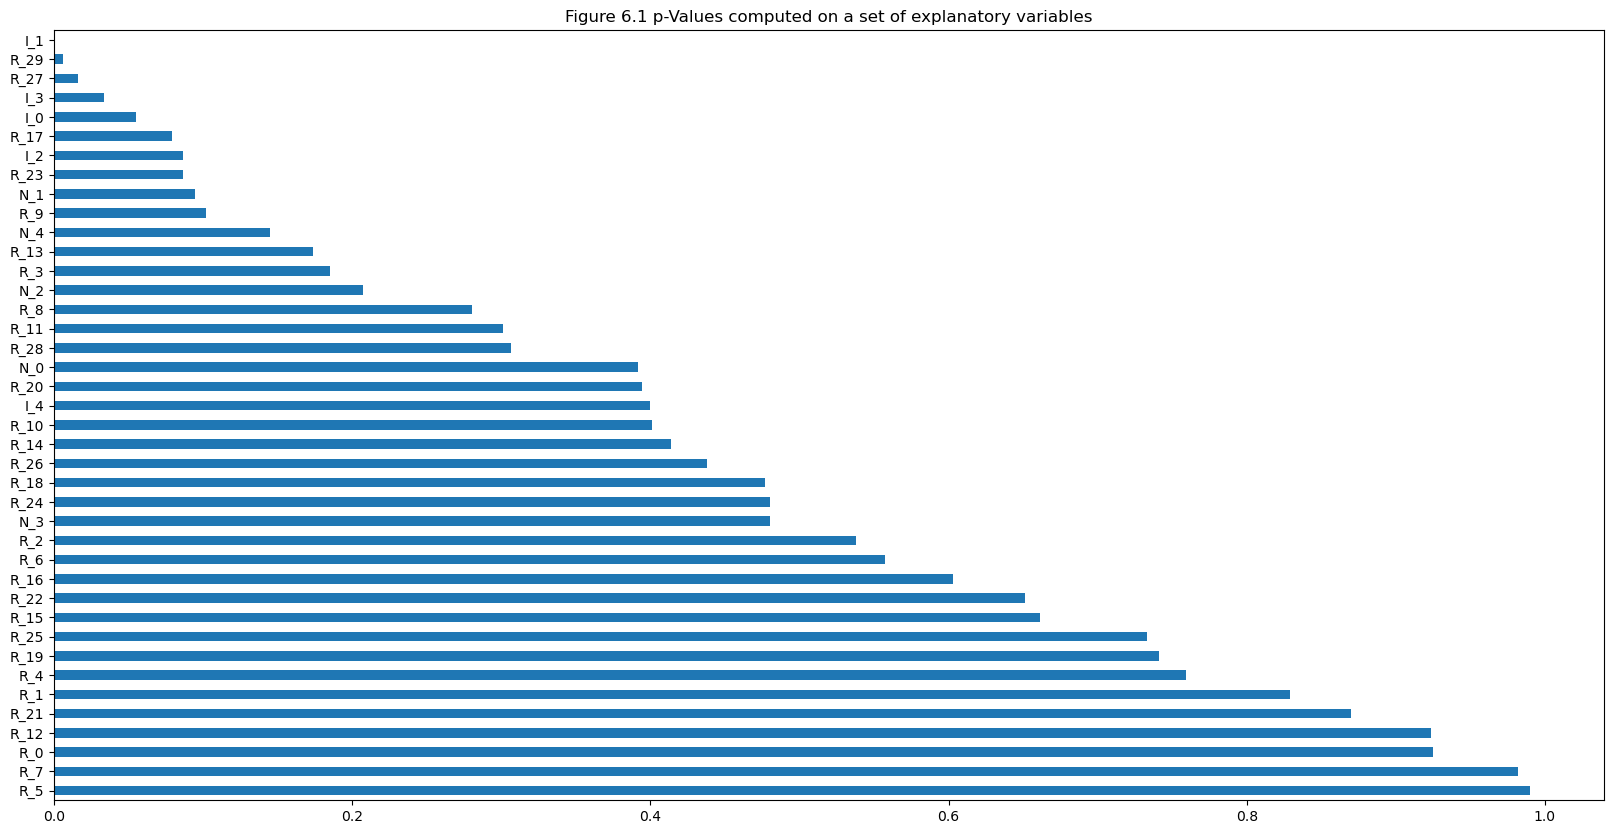

In [2]:
# 40 features, 5 informative features, 30 redundant, 5 noisy features
X, y = getTestData(40, 5, 30, 10000, sigmaStd=.1)
ols = sm1.Logit(y, X).fit()
ols.summary()
plot_data = ols.pvalues.sort_values(ascending=False)
plot_data.plot(kind='barh', figsize=(20,10), title="Figure 6.1 p-Values computed on a set of explanatory variables")
plt.show()

In [3]:
#code snippet 6.2
X, y = getTestData(40, 5, 30, 10000, sigmaStd=.1)
clf = DecisionTreeClassifier(criterion='entropy', 
                                max_features=1, 
                                class_weight='balanced', 
                                min_weight_fraction_leaf=0)
                                
clf = BaggingClassifier(base_estimator=clf, 
                        n_estimators=1000, 
                        max_features=1., 
                        max_samples=1., 
                        oob_score=False)
fit = clf.fit(X,y)
imp = featImpMDI(fit, featNames=X.columns)
# Note: running it takes several minutes.

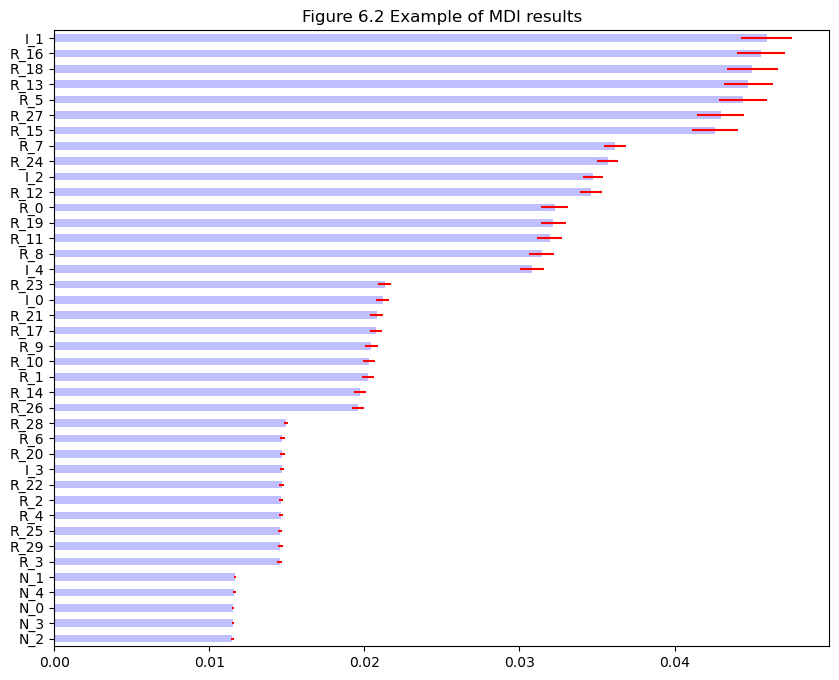

In [4]:
#print the graph Example 6.2 Example of MDI results
imp.sort_values('mean', inplace=True)
plt.figure(figsize=(10, imp.shape[0] / 5))
imp['mean'].plot(kind='barh', color='b', alpha=0.25, xerr=imp['std'], error_kw={'ecolor': 'r'})
plt.title('Figure 6.2 Example of MDI results')
plt.show()

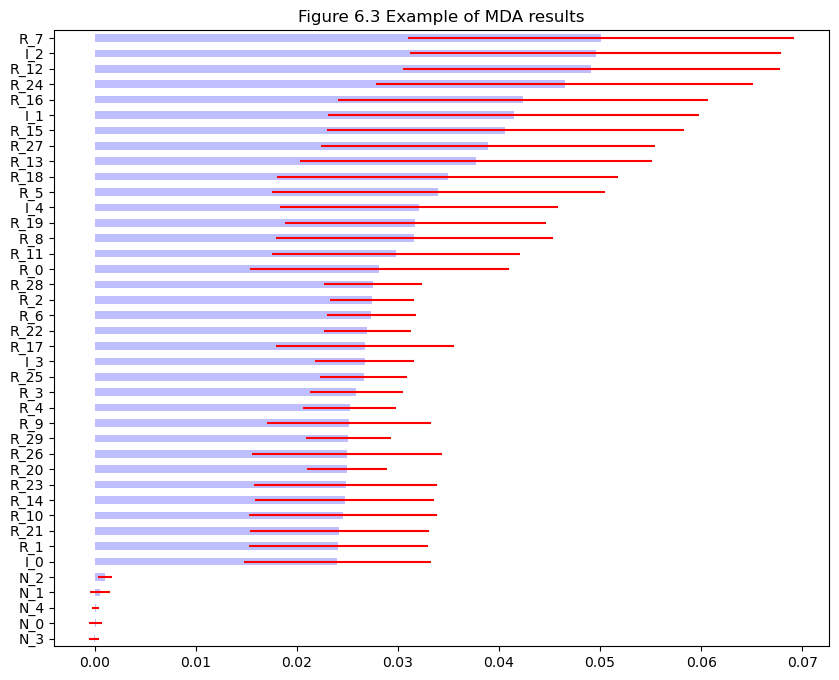

In [5]:
#code snippet 6.3
X, y = getTestData(40, 5, 30, 10000, sigmaStd=.1)
clf = DecisionTreeClassifier(criterion='entropy', 
                                max_features=1, 
                                class_weight='balanced', 
                                min_weight_fraction_leaf=0)
                                
clf = BaggingClassifier(base_estimator=clf, 
                        n_estimators=1000, 
                        max_features=1., 
                        max_samples=1., 
                        oob_score=False)
fit = clf.fit(X,y)
imp = featImpMDA(clf, X, y, 10)

imp.sort_values('mean', inplace=True)
plt.figure(figsize=(10, imp.shape[0] / 5))
imp['mean'].plot(kind='barh', color='b', alpha=0.25, xerr=imp['std'], error_kw={'ecolor': 'r'})
plt.title('Figure 6.3 Example of MDA results')
plt.show()
# Note: running it takes several tens of minutes.

maxNumClusters10


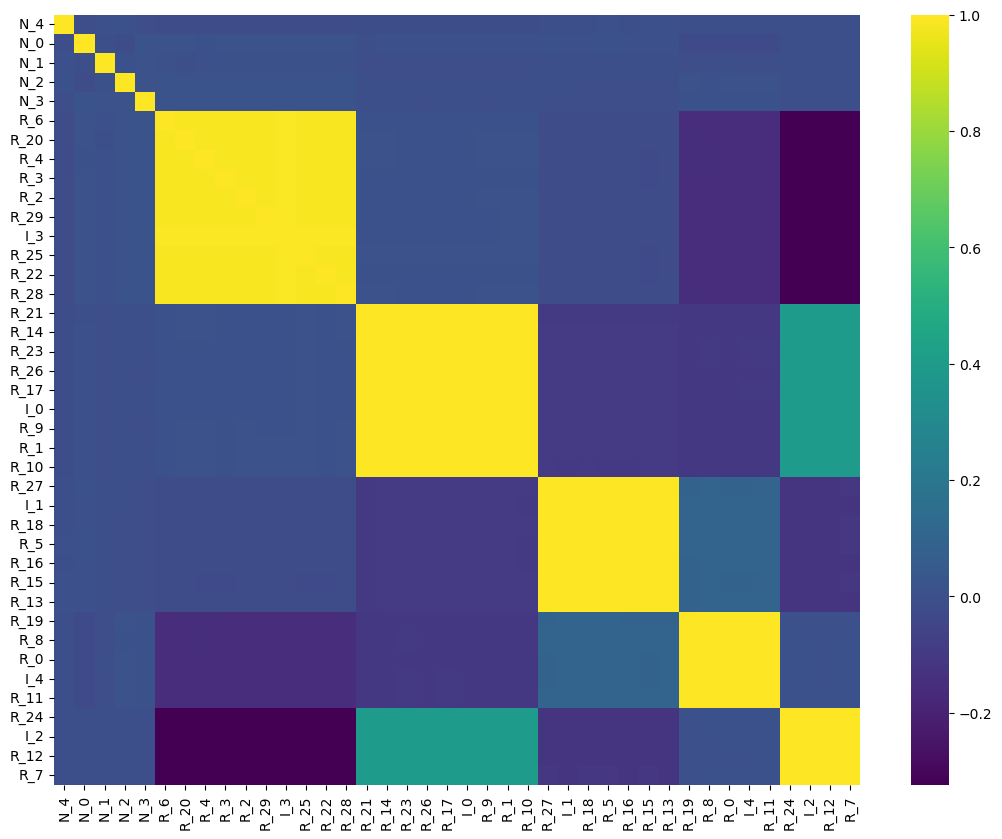

In [6]:
#code snippet 6.6 - features clustering step
X, y = getTestData(40, 5, 30, 10000, sigmaStd=.1)
corr0, clstrs, silh = clusterKMeansBase(X.corr(), maxNumClusters=10, n_init=10)
fig, ax = plt.subplots(figsize=(13,10))  
sns.heatmap(corr0, cmap='viridis')
plt.show()
# Note: running it takes several minutes.

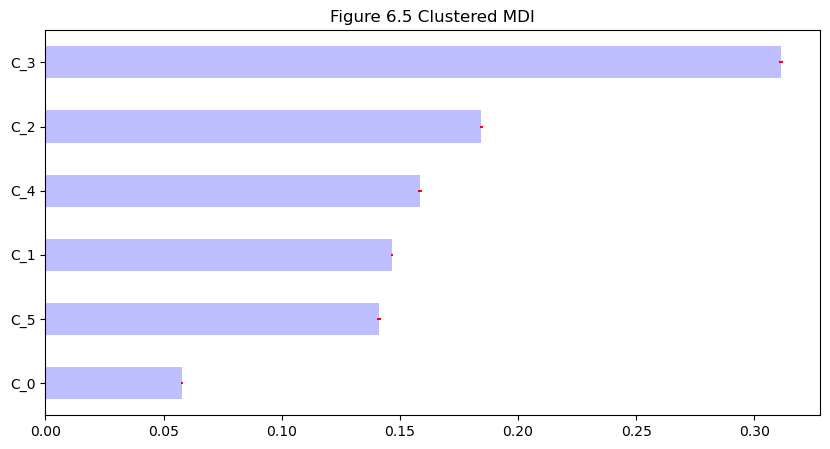

In [7]:
#code snippet 6.7 - calling the functions for clustered MDI
X, y = getTestData(40, 5, 30, 10000, sigmaStd=.1)
clf = DecisionTreeClassifier(criterion='entropy', 
                                max_features=1, 
                                class_weight='balanced', 
                                min_weight_fraction_leaf=0)
                                
clf = BaggingClassifier(base_estimator=clf, 
                        n_estimators=1000, 
                        max_features=1., 
                        max_samples=1., 
                        oob_score=False)
fit = clf.fit(X,y)
imp = featImpMDI_Clustered(fit, X.columns, clstrs)

imp.sort_values('mean', inplace=True)
plt.figure(figsize=(10, 5))
imp['mean'].plot(kind='barh', color='b', alpha=0.25, xerr=imp['std'], error_kw={'ecolor': 'r'})
plt.title('Figure 6.5 Clustered MDI')
plt.show()
# Note: running it takes several minutes.

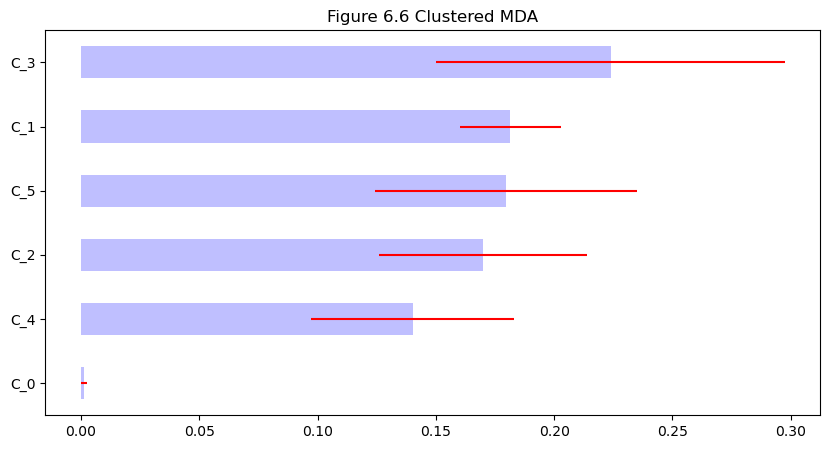

In [8]:
#code snippet 6.8 - calling the functions for clustered MDA
clf = DecisionTreeClassifier(criterion='entropy', 
                                max_features=1, 
                                class_weight='balanced', 
                                min_weight_fraction_leaf=0)
                                
clf = BaggingClassifier(base_estimator=clf, 
                        n_estimators=1000, 
                        max_features=1., 
                        max_samples=1., 
                        oob_score=False)
fit = clf.fit(X,y)
imp = featImpMDA_Clustered(clf, X, y, clstrs, 10)

imp.sort_values('mean', inplace=True)
plt.figure(figsize=(10, 5))
imp['mean'].plot(kind='barh', color='b', alpha=0.25, xerr=imp['std'], error_kw={'ecolor': 'r'})
plt.title('Figure 6.6 Clustered MDA')
plt.show()
# Note: running it takes several tens of minutes.